## UN Project

3.     Import the required packages with their customary aliases as follows:

In [ ]:
 ## Read gdp data as csv

In [3]:
    import pandas as pd   
    import numpy as np  
    import matplotlib.pyplot as plt  
    import seaborn as sns

4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [4]:
gdp_df =pd.read_csv('../data/gdp_percapita.csv.csv')

In [5]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN


In [6]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
7171,Zimbabwe,1994,2603.927369,NaN
7172,Zimbabwe,1993,2420.092791,NaN
7173,Zimbabwe,1992,2437.152908,NaN
7174,Zimbabwe,1991,2733.696626,NaN
7175,Zimbabwe,1990,2652.129209,NaN


5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [7]:
gdp_df.shape

(7176, 4)

In [8]:
## data type for each column


In [9]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [10]:
gdp_df.columns

Index(['Country or Area', 'Year', 'Value', 'Value Footnotes'], dtype='object')

6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [11]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])

In [12]:
gdp_df.columns

Index(['Country or Area', 'Year', 'Value'], dtype='object')

In [13]:
## rename

In [14]:
gdp_df = gdp_df.rename(columns = {'Country or Area' : 'Country','Year' : 'Year','Value' : 'GDP_Per_Capita'})

In [15]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [16]:
## to see any possible null countries and how many countries have data all years

In [17]:
gdp_df.Country.value_counts(dropna = False)

Country
Least developed countries: UN classification    31
Niger                                           31
Middle East & North Africa (IDA & IBRD)         31
Middle income                                   31
Mongolia                                        31
                                                ..
Kosovo                                          13
Turks and Caicos Islands                        10
Sint Maarten (Dutch part)                       10
Somalia                                          8
Djibouti                                         8
Name: count, Length: 242, dtype: int64

In [18]:
## or I can use gdp_df.Country.value_counts()

In [19]:
## no null value

In [20]:
Country_numbers = gdp_df.Country.value_counts()

In [21]:
Country_numbers = Country_numbers.to_frame()

In [22]:
type(Country_numbers)

pandas.core.frame.DataFrame

In [23]:
Country_numbers

,count
Country,
Least developed countries: UN classification,31
Niger,31
Middle East & North Africa (IDA & IBRD),31
Middle income,31
Mongolia,31
...,...
Kosovo,13
Turks and Caicos Islands,10
Sint Maarten (Dutch part),10


In [24]:
Country_numbers.reset_index()

,Country,count
0,Least developed countries: UN classification,31
1,Niger,31
2,Middle East & North Africa (IDA & IBRD),31
3,Middle income,31
4,Mongolia,31
...,...,...
237,Kosovo,13
238,Turks and Caicos Islands,10
239,Sint Maarten (Dutch part),10
240,Somalia,8


In [25]:
Country_numbers.query('count == 31')
#country_numbers of max count = the number of years

,count
Country,
Least developed countries: UN classification,31
Niger,31
Middle East & North Africa (IDA & IBRD),31
Middle income,31
Mongolia,31
...,...
IDA only,31
Fragile and conflict affected situations,31
Ireland,31


In [26]:
## 205 countries have data all years.

In [27]:
 Country_numbers.query('count != 31').head()

,count
Country,
Turkmenistan,30
Hungary,30
Slovak Republic,29
Cambodia,28
West Bank and Gaza,27


In [28]:
missing_data = Country_numbers.query('count != 31')

In [29]:
missing_data.shape

(37, 1)

In [30]:
## 37 countries missing data

In [31]:
gdp_df.Year.value_counts().head()

Year
2018    242
2017    242
2016    242
2015    242
2014    242
Name: count, dtype: int64

In [32]:
year_observation = gdp_df.Year.value_counts()

In [33]:
year_observation = year_observation.to_frame()

In [34]:
type(year_observation)

pandas.core.frame.DataFrame

In [35]:
year_observation.reset_index().head()

,Year,count
0,2018,242
1,2017,242
2,2016,242
3,2015,242
4,2014,242


In [36]:
year_observation.rename(columns = {'count':'observation'}).head()

,observation
Year,
2018,242
2017,242
2016,242
2015,242
2014,242


In [37]:
year_observation.shape

(31, 1)

In [38]:
# as the year in progress the number of observation increased until 2018 then slightly decreased until 2020.

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [39]:
    import matplotlib.pyplot as plt  
    import seaborn as sns

In [40]:
gdp_df.loc[gdp_df['Year'] == 2020]

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
19,Africa Eastern and Southern,2020,3491.978104
50,Africa Western and Central,2020,4021.293919
81,Albania,2020,13253.733337
112,Algeria,2020,10735.382539
...,...,...,...
7025,Vietnam,2020,10338.270543
7056,West Bank and Gaza,2020,5402.538773
7083,World,2020,16269.969854
7114,Zambia,2020,3277.816510


In [41]:
year2020 = gdp_df.loc[gdp_df['Year'] == 2020]

In [42]:
year2020['GDP_Per_Capita']

0        1970.560169
19       3491.978104
50       4021.293919
81      13253.733337
112     10735.382539
            ...     
7025    10338.270543
7056     5402.538773
7083    16269.969854
7114     3277.816510
7145     2134.555461
Name: GDP_Per_Capita, Length: 240, dtype: float64

In [43]:
data2020 = year2020['GDP_Per_Capita']
data2020

0        1970.560169
19       3491.978104
50       4021.293919
81      13253.733337
112     10735.382539
            ...     
7025    10338.270543
7056     5402.538773
7083    16269.969854
7114     3277.816510
7145     2134.555461
Name: GDP_Per_Capita, Length: 240, dtype: float64

## Histogram Plot

<Axes: xlabel='GDP_Per_Capita', ylabel='Count'>

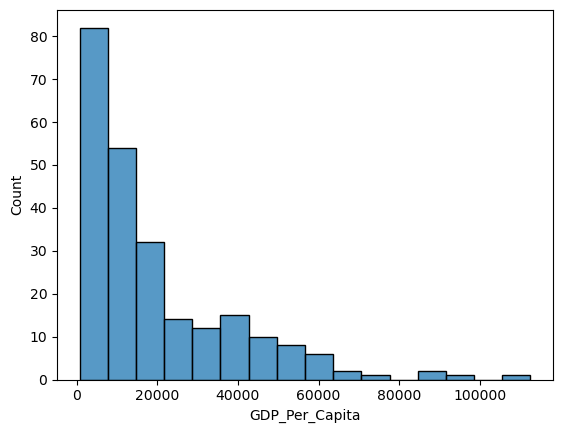

In [44]:
sns.histplot(data2020)

## Density plot

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

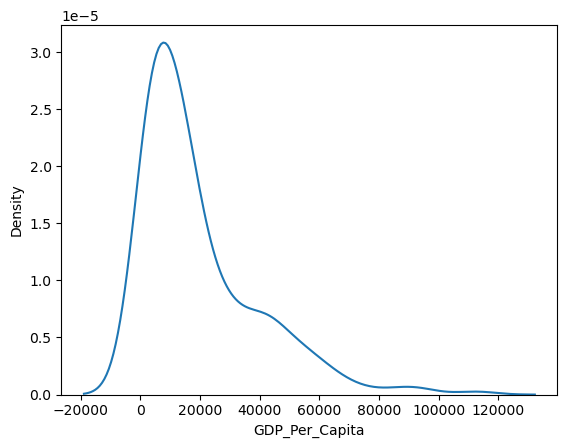

In [45]:
sns.kdeplot(data2020)

## Boxplot

<Axes: >

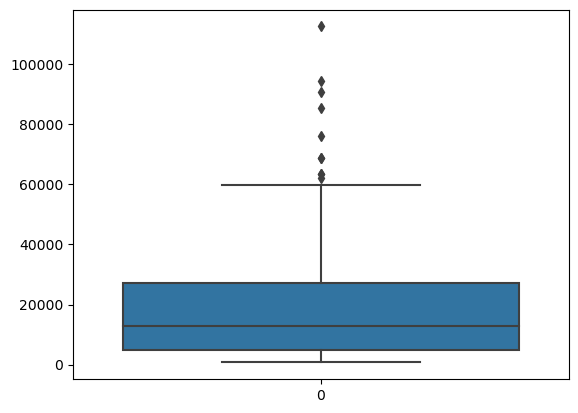

In [46]:
sns.boxplot(data2020)

## violin plot

<Axes: >

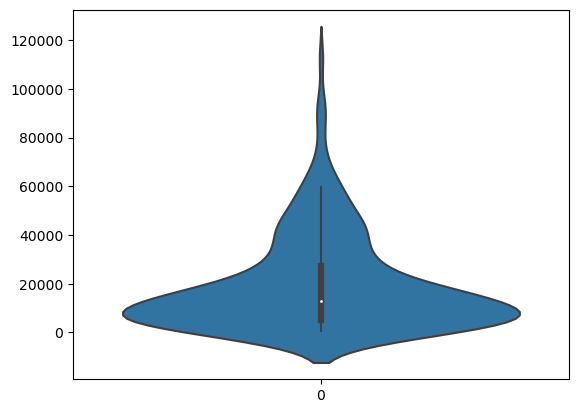

In [47]:
sns.violinplot(data2020)

In [48]:
## when GDB-Per-Capita distribution is high, data distribution getting less and the vice-versa.
#

9. What was the median GDP per capita value in 2020?

In [49]:
data2020

0        1970.560169
19       3491.978104
50       4021.293919
81      13253.733337
112     10735.382539
            ...     
7025    10338.270543
7056     5402.538773
7083    16269.969854
7114     3277.816510
7145     2134.555461
Name: GDP_Per_Capita, Length: 240, dtype: float64

In [50]:
sorteddata = data2020.sort_values().to_frame

In [51]:
sorteddata

<bound method Series.to_frame of 914        731.064074
1136       937.856470
1524      1082.445242
5871      1180.965971
4750      1221.269930
            ...      
639      76105.138057
5381     85290.450430
3071     90789.221024
5720     94505.636160
3882    112557.309472
Name: GDP_Per_Capita, Length: 240, dtype: float64>

In [52]:
round(data2020.median(),2)

12908.94

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-

In [53]:
gdp_df['Year']

0       2020
1       2019
2       2018
3       2017
4       2016
        ... 
7171    1994
7172    1993
7173    1992
7174    1991
7175    1990
Name: Year, Length: 7176, dtype: int64

In [69]:
decade_Years = [1990,2000,2010,2020]

In [81]:
gdp_decades = gdp_df.query('Year in @ decade_Years')

In [82]:
gdp_decades

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
10,Afghanistan,2010,1957.029070
19,Africa Eastern and Southern,2020,3491.978104
29,Africa Eastern and Southern,2010,3545.205203
39,Africa Eastern and Southern,2000,2915.472987
...,...,...,...
7144,Zambia,1990,2190.181724
7145,Zimbabwe,2020,2134.555461
7155,Zimbabwe,2010,1813.531764
7165,Zimbabwe,2000,2771.060576


Boxplot

In [86]:
# sns.boxplot( x=df["species"], y=df["sepal_length"] )

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

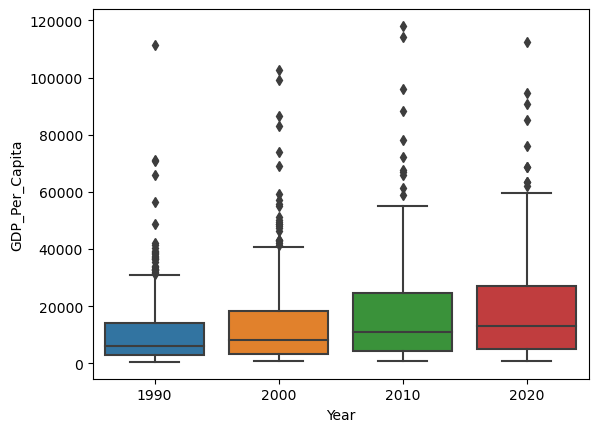

In [96]:
sns.boxplot(x = gdp_decades['Year'] ,
            y = gdp_decades['GDP_Per_Capita'])

Barplot

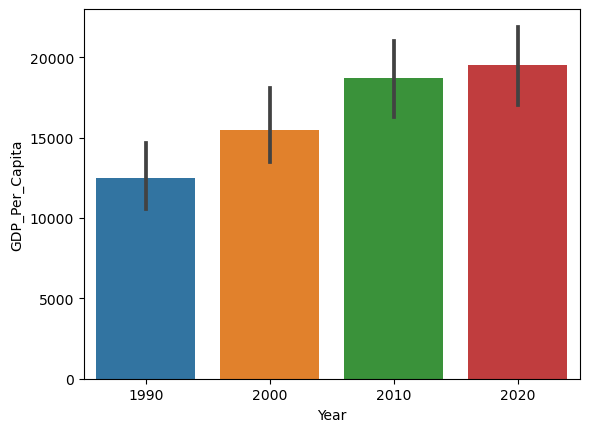

In [98]:
sns.barplot(
    y='GDP_Per_Capita', 
    x='Year', 
    data=gdp_decades); 

In [ ]:
Scatterplot

scatterplot with a trend line overlaid

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

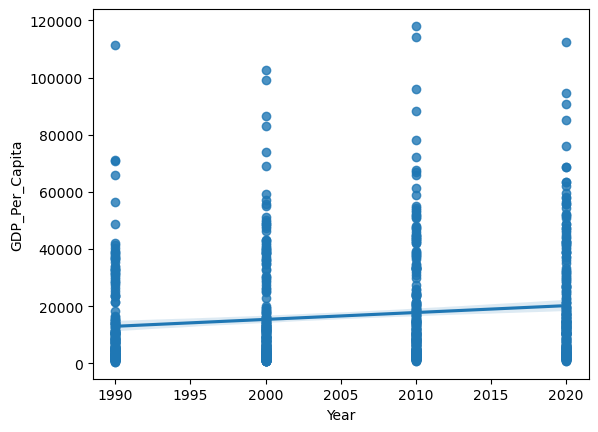

In [103]:
sns.regplot(x = gdp_decades['Year'],
            y = gdp_decades['GDP_Per_Capita'])

scatterplot with a trend line overlaid